<a href="https://colab.research.google.com/github/mmastin/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Matt_Mastin_DS_124_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-04-25 16:35:24--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [               <=>  ]  21.37M   805KB/s    in 28s     

2019-04-25 16:35:52 (793 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22408410]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4950.84","4950.84","940.5","940.50","649.16","291.34","0.0","0.0","0.0","Mar-2019","190.21","Apr-2019","Mar-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","Cash","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","2

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

In [12]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2) # header=1 also works
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(128412, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.0,60 months,13.56%,276.49,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15000,15000,14975.0,60 months,14.47%,352.69,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,16000.0,60 months,17.97%,406.04,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum()

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
pd.options.display.max_rows=500

In [14]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_loan_status                          128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
hardship_dpd                                  128411
hardship_payoff_balance_amount                128411
orig_projected_additional_accrued_interest    128411
hardship_status                               128411
hardship_last_payment_amount                  128411
hardship_reason                               128411
hardship_type                                 128411
deferral_term                                 128411
settlement_percentage                         

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [15]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [16]:
# for loops also work but this method is cleaner to convert object to floats

df['int_rate']

0          10.33%
1          13.56%
2          13.56%
3          14.47%
4          17.97%
5          23.40%
6          23.40%
7          20.89%
8          12.98%
9          23.40%
10         26.31%
11         18.94%
12         19.92%
13         17.97%
14         20.89%
15         11.80%
16         23.40%
17         15.02%
18         11.31%
19         10.33%
20         27.27%
21         16.14%
22         26.31%
23         15.02%
24         18.94%
25         11.31%
26         11.31%
27         14.47%
28         16.14%
29         14.47%
30         23.40%
31         10.72%
32         11.80%
33         15.02%
34         14.47%
35         11.31%
36         23.40%
37         10.33%
38         14.47%
39         11.80%
40         12.98%
41         19.92%
42         17.97%
43          6.46%
44         10.72%
45         12.98%
46         11.80%
47         20.89%
48         18.94%
49         16.14%
50         14.47%
51         10.72%
52         16.14%
53         11.31%
54         11.80%
55        

In [17]:
df.describe() # (exclude='number') takes out numerics

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.00,5.000000,5.000000,5.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.261221,8.279733e+04,NaN,NaN,19.933178,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5402.600000,64.024000,15.600000
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718371,1.082985e+05,NaN,NaN,20.143542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2851.191733,2.250084,3.286335
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,2576.000000,60.000000,12.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,253.630000,4.705800e+04,NaN,NaN,11.760000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,3980.000000,65.000000,12.000000
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,382.905000,6.800000e+04,NaN,NaN,17.990000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,4895.000000,65.000000,18.000000
75%,NaN,NaN,21600.000000,21600.000000,21600.000000,622.680000,9.900000e+04,NaN,NaN,25.300000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5443.000000,65.000000,18.000000
max,NaN,NaN,40000.000000,40000.000000,40000.000000,1618.240000,9.757200e+06,NaN,NaN,999.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,10119.000000,65.120000,18.000000


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [19]:
'13.56%'.strip('%')

'13.56'

In [20]:
type('13.56%'.strip('%'))

str

In [21]:
float('13.56%'.strip('%'))

13.56

In [22]:
type(float('13.56%'.strip('%')))

float

In [0]:
# lambda means anonymous function that can be reused

def myfunc():
  

In [23]:
example_list = ['13.56%', '13.06%', '13.58%']

def remove_percent(string):
  return float(string.strip('%'))

remove_percent('13.55%')

13.55

In [24]:
# remove percentages and changed data type from object to float

df['int_rate'] = df['int_rate'].apply(remove_percent)
df['int_rate'].head()

0    10.33
1    13.56
2    13.56
3    14.47
4    17.97
Name: int_rate, dtype: float64

Apply the function to the `int_rate` column

In [25]:
# Data Frame filtering

col_name = 'term'
df[col_name]

0          36 months
1          36 months
2          60 months
3          60 months
4          60 months
5          36 months
6          36 months
7          36 months
8          36 months
9          36 months
10         60 months
11         60 months
12         60 months
13         36 months
14         60 months
15         60 months
16         36 months
17         60 months
18         60 months
19         36 months
20         60 months
21         60 months
22         60 months
23         36 months
24         36 months
25         36 months
26         60 months
27         60 months
28         36 months
29         36 months
30         36 months
31         36 months
32         36 months
33         36 months
34         60 months
35         36 months
36         36 months
37         36 months
38         60 months
39         36 months
40         36 months
41         60 months
42         60 months
43         36 months
44         36 months
45         36 months
46         36 months
47         60

In [29]:
df[df['term'] == ' 36 months'].shape
# df.loc[0]

# desktop_users = df[df['mobile'] == False]
# mobile_users = df[df['mobile'] == True]

(88179, 145)

In [34]:
# data frame filtering

int_rate_greater_than_13 = df[df['int_rate'] >= 13.00]

int_rate_greater_than_13.reset_index() 
int_rate_greater_than_13


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,NaN,NaN,2500,2500,2500.000000,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.000000,60 months,13.56,276.49,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15000,15000,14975.000000,60 months,14.47,352.69,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,16000.000000,60 months,17.97,406.04,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,9600,9600,9600.000000,36 months,23.40,373.62,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,4000,4000,4000.000000,36 months,23.40,155.68,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3500,3500,3500.000000,36 months,20.89,131.67,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,8000,8000,8000.000000,36 months,23.40,311.35,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,16000,16000,16000.000000,60 months,26.31,481.99,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,30000,30000,30000.000000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.loc[] #location; [0] gives first row; df.loc[0][5] gives term in first row
df.iloc[] #index location

### Clean `emp_title`

Look at top 20 titles

In [37]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [36]:
df['emp_title'].isnull().sum()

20947

How often is `emp_title` null?

Clean the title and handle missing values

In [39]:
import numpy as np

examples = ['owner', 'Supervisor', 'Project Manager', np.NaN]

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
#   making sure capitalization same
  else:
    return 'Unknown'
  
[clean_title(x) for x in examples]
  
  
# type(np.Nan)

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

In [41]:
df['emp_title'].head(10)

0                      Unknown
1                         Chef
2                      Unknown
3                      Unknown
4    Instructional Coordinator
5           Driver Coordinator
6                     Security
7                Gas Attendant
8                      Unknown
9                      Manager
Name: emp_title, dtype: object

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [44]:
# df.emp_title_manager = True ; don't do this when trying to create a column
# have to use bracket notation when creating new columns 
df['emp_title_manager] = True  

True

In [45]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df['emp_title_manager']


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9          True
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17         True
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42         True
43        False
44        False
45        False
46         True
47        False
48        False
49         True
50        False
51         True
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61         True
62      

In [46]:
df[df['emp_title_manager'] == False]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,NaN,NaN,10000,10000,10000.000000,36 months,10.33,324.23,B,B1,...,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,2500,2500,2500.000000,36 months,13.56,84.92,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,12000,12000,12000.000000,60 months,13.56,276.49,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,NaN,NaN,15000,15000,14975.000000,60 months,14.47,352.69,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,NaN,NaN,16000,16000,16000.000000,60 months,17.97,406.04,D,D1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5,NaN,NaN,9600,9600,9600.000000,36 months,23.40,373.62,E,E1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
6,NaN,NaN,4000,4000,4000.000000,36 months,23.40,155.68,E,E1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
7,NaN,NaN,3500,3500,3500.000000,36 months,20.89,131.67,D,D4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
8,NaN,NaN,9600,9600,9600.000000,36 months,12.98,323.37,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
10,NaN,NaN,16000,16000,16000.000000,60 months,26.31,481.99,E,E4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False


In [48]:
managers = df[df['emp_title_manager'] == True]
plebes = df[df['emp_title_manager'] == False]

print(managers['int_rate'].mean())
print(plebes['int_rate'].mean())

12.761061961748679
12.957875870805788


In [49]:
print(managers['int_rate'].std())

5.07073567535501


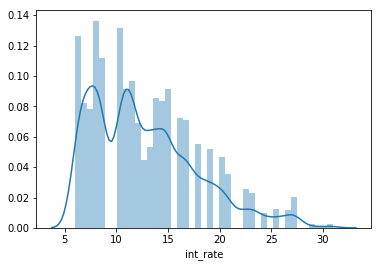

In [50]:
import seaborn as sns
sns.distplot(managers['int_rate']);

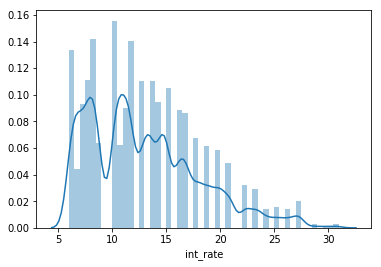

In [51]:
sns.distplot(plebes['int_rate']);

In [0]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# sns.distplot(managers['int_rate'], ax=ax1, axlabel=False);
# sns.distplot(plebians['int_rate'], ax=ax2, axlabel=False);

# ax1.set_ylabel("Managers");
# ax2.set_ylabel("Plebians");

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [53]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [54]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [57]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
# alt enter creates new cell

In [60]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [63]:
df['issue_d'].dt.year
df['issue_d'].dt.month

# '19' + '08-04'

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [67]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

print(df.shape)
df.head()

(128412, 148)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month
0,NaN,NaN,10000,10000,10000.0,36 months,10.33,324.23,B,B1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
1,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
2,NaN,NaN,12000,12000,12000.0,60 months,13.56,276.49,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
3,NaN,NaN,15000,15000,14975.0,60 months,14.47,352.69,C,C2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
4,NaN,NaN,16000,16000,16000.0,60 months,17.97,406.04,D,D1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12


In [70]:
df['issue_month'].value_counts()

10    46305
11    41973
12    40134
Name: issue_month, dtype: int64

In [71]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [72]:
df['earliest_cr_line'].head() 

0    Jan-1996
1    Apr-2001
2    Aug-2005
3    Oct-1999
4    Oct-2005
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [79]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['days_from_earliest_credit_to_issue']

0          8370
1          6453
2          4870
3          7001
4          4809
5          5570
6          4474
7          5174
8          5509
9          8735
10         3013
11        11506
12         4992
13         2801
14         7973
15         4870
16         4232
17         5113
18         4627
19         5782
20         7243
21         5570
22         4079
23         5113
24         2891
25         3287
26         5023
27         3409
28         5023
29         6239
30         4992
31        11201
32         4901
33         1522
34         3378
35         3136
36         2891
37         1522
38        10015
39         2282
40         1979
41         4413
42         6270
43         5997
44         2648
45         7062
46         9862
47         1522
48         6635
49         4658
50         5327
51         3987
52         3470
53         7608
54        16346
55         6331
56         5601
57         4171
58         2618
59         5174
60         4717
61         1856
62      

In [80]:
df['loan_status'].value_counts(dropna=False)

Current               121676
Fully Paid              4908
Late (31-120 days)       849
In Grace Period          513
Late (16-30 days)        344
Charged Off              122
Name: loan_status, dtype: int64

In [78]:
df.describe(include='datetime')

,issue_d,earliest_cr_line
count,128412,128412
unique,3,644
top,2018-10-01 00:00:00,2006-08-01 00:00:00
freq,46305,1130
first,2018-10-01 00:00:00,1950-01-01 00:00:00
last,2018-12-01 00:00:00,2015-11-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# typed along during lecture, typing out again for practice

!wget
!unzip
!head
!tail
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
print(df.shape)
df.head()
df.isnull().sum()
pd.options.display.max_rows=500
df.isnull().sum().sort_values(ascending=False)
df.dtypes
df['int_rate']
df.describe()
'13.4%'.strip('%')
float('13.4%'.strip('%'))
def remove_percent(string):
  return float(string.strip('%'))
remove_percent('13.55')
df['int_rate'] = df['int_rate'].apply(remove_percent)
df['int_rate'].head
col_name = 'term'
df[col_name]
df[df['term'] == ' 36 months'].shape
int_rate_greater_than_13 = df[df['int_rate'] >= 13.00]
int_rate_greater_than_13.reset_index()
df.loc[]
df.iloc[]
df['empty_title'].value_counts(dropna=False).head()
import numpy as np
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
[clean_title(x) for x in examples]
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df['emp_title_manager']

In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-04-25 20:23:12--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [               <=>  ]  21.37M   889KB/s    in 25s     

2019-04-25 20:23:38 (874 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22408410]



In [3]:
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc

In [5]:
import pandas as pd
import numpy as np

LC_Data = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
print(LC_Data.shape)
LC_Data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


(128412, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.0,60 months,13.56%,276.49,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15000,15000,14975.0,60 months,14.47%,352.69,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,16000.0,60 months,17.97%,406.04,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def remove_months(string):
  return int(string.strip(' months'))

remove_months('36 months')

36

In [8]:
LC_Data['term'] = LC_Data['term'].apply(remove_months)
LC_Data['term'].head()

0    36
1    36
2    60
3    60
4    60
Name: term, dtype: int64

In [9]:
LC_Data['loan_status'].describe()

count      128412
unique          6
top       Current
freq       121676
Name: loan_status, dtype: object

In [0]:
LC_Data['loan_status_is_great'] = LC_Data['loan_status'].str.contains('Current', 'Fully Paid').astype('int')

In [19]:
LC_Data['loan_status_is_great'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: loan_status_is_great, dtype: int64

In [20]:
LC_Data['loan_status'].head(10)

0    Current
1    Current
2    Current
3    Current
4    Current
5    Current
6    Current
7    Current
8    Current
9    Current
Name: loan_status, dtype: object

In [22]:
LC_Data['last_pymnt_d'].head()

0    Feb-2019
1    Feb-2019
2    Feb-2019
3    Feb-2019
4    Feb-2019
Name: last_pymnt_d, dtype: object

In [24]:
LC_Data['last_pymnt_d'].describe()

count       128249
unique           6
top       Mar-2019
freq        114588
Name: last_pymnt_d, dtype: object

In [0]:
LC_Data['last_pymnt_d'] = pd.to_datetime(LC_Data['last_pymnt_d'], infer_datetime_format=True)

In [26]:
LC_Data['last_pymnt_d'].head().values

array(['2019-02-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
LC_Data['issue_year'] = LC_Data['last_pymnt_d'].dt.year
LC_Data['issue_month'] = LC_Data['last_pymnt_d'].dt.month

In [33]:
LC_Data['issue_year'].head(5)

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: issue_year, dtype: float64

In [34]:
LC_Data['issue_month'].head(5)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: issue_month, dtype: float64

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [36]:
pd.options.display.max_rows=500

LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_is_great,issue_year,issue_month
0,NaN,NaN,10000,10000,10000.0,36,10.33%,324.23,B,B1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,2.0
1,NaN,NaN,2500,2500,2500.0,36,13.56%,84.92,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,2.0
2,NaN,NaN,12000,12000,12000.0,60,13.56%,276.49,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,2.0
3,NaN,NaN,15000,15000,14975.0,60,14.47%,352.69,C,C2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,2.0
4,NaN,NaN,16000,16000,16000.0,60,17.97%,406.04,D,D1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,2.0


In [39]:
LC_Data['settlement_percentage']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56       NaN
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01